In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import layers, models
import numpy as np

In [2]:
# Create list of all targets (minus background noise)
dataset_path = 'C:/Users/user/Desktop/recordingSpecAugment2'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['backgroundNoise', 'ㄏㄧㄡ', 'ㄟ', '他', '你', '吼', '啦', '嗯', '好', '我', '的', '的一個', '的這個', '的那個', '著', '那', '那那個', '阿']


In [3]:
# Settings
feature_sets_path = './'
feature_sets_filename = './npz/recordingSpecAugment2_wen.npz'
model_filename = 'recordingSpecAugmen2t_wen.h5'


In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']
print(y_test)
print(y_train)
print(y_val)

[ 5.  3. 10. ... 11. 14.  7.]
[ 7. 15. 12. ...  2. 15.  1.]
[ 0.  5.  8. ... 13. 15.  8.]


In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(8868, 13, 49)
(2956, 13, 49)
(2956, 13, 49)


In [7]:
# Peek at labels
print(y_val)

[ 0.  5.  8. ... 13. 15.  8.]


In [8]:
# Peek at labels after conversion
print(y_test)

[ 5.  3. 10. ... 11. 14.  7.]


In [9]:
# View the dimensions of our input data
print(x_train.shape)

(8868, 13, 49)


In [10]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(8868, 13, 49, 1)
(2956, 13, 49, 1)
(2956, 13, 49, 1)


In [11]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(13, 49, 1)


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (2, 2), activation='relu',input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


model.add(layers.Conv2D(64, (2, 2), activation='relu'))#64
model.add(layers.MaxPooling2D(pool_size=(2, 2)))



model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(1, 1)))
model.add(layers.Dropout(0.4))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))#64
model.add(layers.Dropout(0.6))
model.add(layers.Dense(18, activation='softmax'))
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 48, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 24, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 23, 64)         8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 11, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 10, 128)        32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 10, 128)        0         
_________________________________________________________________
dropout (Dropout)            (None, 1, 10, 128)        0

In [13]:
from tensorflow.keras import optimizers
# Add training parameters to model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',    #'adam'
              metrics=['acc'])

In [14]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=150,
                    batch_size=70,
                    validation_data=(x_val, y_val))

Epoch 1/150
127/127 [==============================] - 5s 36ms/step - loss: 3.7954 - acc: 0.0602 - val_loss: 2.7951 - val_acc: 0.1573
Epoch 2/150
127/127 [==============================] - 3s 27ms/step - loss: 2.7717 - acc: 0.1203 - val_loss: 2.5009 - val_acc: 0.2270
Epoch 3/150
127/127 [==============================] - 4s 30ms/step - loss: 2.5786 - acc: 0.1679 - val_loss: 2.2608 - val_acc: 0.3616
Epoch 4/150
127/127 [==============================] - 4s 28ms/step - loss: 2.3370 - acc: 0.2468 - val_loss: 1.7292 - val_acc: 0.4767
Epoch 5/150
127/127 [==============================] - 4s 28ms/step - loss: 2.0220 - acc: 0.3465 - val_loss: 1.4125 - val_acc: 0.5809
Epoch 6/150
127/127 [==============================] - 4s 28ms/step - loss: 1.8115 - acc: 0.4079 - val_loss: 1.3612 - val_acc: 0.5940
Epoch 7/150
127/127 [==============================] - 4s 28ms/step - loss: 1.6590 - acc: 0.4568 - val_loss: 1.2259 - val_acc: 0.6258
Epoch 8/150
127/127 [==============================] - 4s 29ms

Epoch 62/150
127/127 [==============================] - 3s 24ms/step - loss: 0.5470 - acc: 0.8063 - val_loss: 0.5534 - val_acc: 0.8386
Epoch 63/150
127/127 [==============================] - 3s 25ms/step - loss: 0.5488 - acc: 0.8120 - val_loss: 0.5450 - val_acc: 0.8376
Epoch 64/150
127/127 [==============================] - 3s 24ms/step - loss: 0.5434 - acc: 0.8177 - val_loss: 0.5766 - val_acc: 0.8312
Epoch 65/150
127/127 [==============================] - 3s 26ms/step - loss: 0.5537 - acc: 0.8048 - val_loss: 0.5609 - val_acc: 0.8312
Epoch 66/150
127/127 [==============================] - 3s 24ms/step - loss: 0.5289 - acc: 0.8164 - val_loss: 0.5397 - val_acc: 0.8413
Epoch 67/150
127/127 [==============================] - 3s 24ms/step - loss: 0.5120 - acc: 0.8148 - val_loss: 0.5431 - val_acc: 0.8417
Epoch 68/150
127/127 [==============================] - 3s 24ms/step - loss: 0.5231 - acc: 0.8107 - val_loss: 0.5319 - val_acc: 0.8515
Epoch 69/150
127/127 [==============================] -

127/127 [==============================] - 4s 28ms/step - loss: 0.3720 - acc: 0.8619 - val_loss: 0.5988 - val_acc: 0.8471
Epoch 123/150
127/127 [==============================] - 4s 31ms/step - loss: 0.4092 - acc: 0.8566 - val_loss: 0.5614 - val_acc: 0.8498
Epoch 124/150
127/127 [==============================] - 5s 42ms/step - loss: 0.3718 - acc: 0.8711 - val_loss: 0.5674 - val_acc: 0.8583
Epoch 125/150
127/127 [==============================] - 5s 38ms/step - loss: 0.4029 - acc: 0.8577 - val_loss: 0.5224 - val_acc: 0.8596
Epoch 126/150
127/127 [==============================] - 4s 32ms/step - loss: 0.3633 - acc: 0.8725 - val_loss: 0.6653 - val_acc: 0.8400
Epoch 127/150
127/127 [==============================] - 3s 27ms/step - loss: 0.4310 - acc: 0.8569 - val_loss: 0.5288 - val_acc: 0.8640
Epoch 128/150
127/127 [==============================] - 3s 26ms/step - loss: 0.3564 - acc: 0.8723 - val_loss: 0.5515 - val_acc: 0.8586
Epoch 129/150
127/127 [==============================] - 4s 33

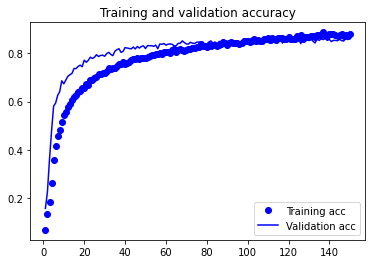

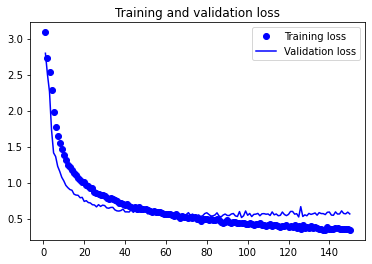

In [15]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
# Save the model as a file
models.save_model(model, './h5/recordingSpecAugment2_wen.h5')

In [17]:
# TEST: Load model and run it against test set
model = models.load_model('./h5/recordingSpecAugment2_wen.h5')
for i in range(0, 10):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 5.0  Prediction: [[2.6139362e-14 1.8039373e-06 1.7922116e-06 1.2727895e-10 7.1041086e-08
  1.0523875e-01 9.8881203e-10 3.1616299e-08 3.6400189e-07 8.9475715e-01
  3.2165190e-08 1.0997433e-15 8.8115031e-17 1.1314275e-17 2.2130964e-08
  3.0471569e-12 4.2916860e-15 6.8197066e-11]]
Answer: 3.0  Prediction: [[8.5158519e-23 1.0320919e-26 2.0535189e-15 1.0000000e+00 1.0355456e-28
  3.1584283e-14 1.1305932e-21 3.9734622e-13 4.0867179e-10 8.5061312e-26
  7.7141534e-22 7.3201540e-37 2.2773693e-30 8.6036529e-31 4.4138712e-16
  1.9299216e-13 4.0476363e-21 4.8339213e-09]]
Answer: 10.0  Prediction: [[4.8707642e-11 7.4087441e-01 4.4605845e-06 5.3559386e-08 2.3607024e-07
  5.6177686e-04 3.6348088e-06 1.0668207e-07 2.7991771e-07 2.0837192e-04
  2.4516638e-01 3.2469394e-10 1.1627249e-09 6.0968780e-10 1.3180147e-02
  2.1355784e-07 3.9950951e-08 1.9257533e-09]]
Answer: 15.0  Prediction: [[0.00069216 0.075871   0.02602919 0.10037452 0.00132971 0.00684523
  0.01534966 0.00867451 0.00087519 0.0244925

In [18]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

93/93 [==============================] - 1s 4ms/step - loss: 0.5707 - acc: 0.8484


[0.5707055926322937, 0.848443865776062]

In [19]:
model.evaluate(x=x_train, y=y_train)

278/278 [==============================] - 1s 4ms/step - loss: 0.0671 - acc: 0.9865


[0.06707866489887238, 0.9864681959152222]

In [20]:
model.evaluate(x=x_val, y=y_val)

93/93 [==============================] - 0s 5ms/step - loss: 0.5641 - acc: 0.8610


[0.5641364455223083, 0.8609607815742493]